## 1. Xử lí ngôn ngữ tự nhiên là gì? 
Xử lý ngôn ngữ tự nhiên (NLP) là một nhánh của khoa học dữ liệu bao gồm các quy trình có hệ thống để phân tích, hiểu và trích xuất thông tin từ dữ liệu văn bản theo cách thông minh và hiệu quả. Bằng cách sử dụng NLP và các thành phần của nó, người ta có thể sắp xếp các khối dữ liệu văn bản khổng lồ, thực hiện nhiều tác vụ tự động và giải quyết nhiều vấn đề như – tóm tắt tự động, dịch máy, nhận dạng thực thể được đặt tên, trích xuất mối quan hệ, phân tích tình cảm, nhận dạng giọng nói và phân đoạn chủ đề, v.v.

Trước khi đi sâu hơn, tôi muốn giải thích một số thuật ngữ được sử dụng trong bài viết:

Tokenization – quá trình chuyển đổi văn bản thành token
Tokens – từ hoặc thực thể có trong văn bản
Đối tượng văn bản(Text object) – một câu hoặc một cụm từ hoặc một từ hoặc một bài viết

## 2. Tiền xử lí văn bản
Vì văn bản là dạng dữ liệu phi cấu trúc nhất trong tất cả các dữ liệu có sẵn, nên có nhiều loại nhiễu khác nhau trong đó và dữ liệu không dễ dàng phân tích được nếu không có bất kỳ quá trình tiền xử lý nào. Toàn bộ quá trình làm sạch và chuẩn hóa văn bản, giúp văn bản không có nhiễu và sẵn sàng để phân tích được gọi là tiền xử lý văn bản.

Quá trình này chủ yếu bao gồm ba bước:

- Loại bỏ nhiễu
- Chuẩn hóa từ điển
- Chuẩn hóa đối tượng
Hình ảnh sau đây cho thấy kiến ​​trúc của quy trình xử lý văn bản trước.

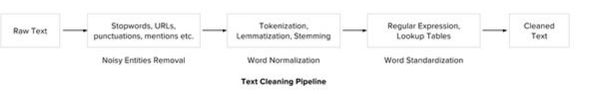

### 2.1. Loại bỏ nhiễu(Noise Removal)
Bất kỳ đoạn văn bản nào không liên quan đến ngữ cảnh của dữ liệu và đầu ra cuối cùng đều có thể được chỉ định là nhiễu.

Ví dụ – từ dừng ngôn ngữ (các từ thường dùng của một ngôn ngữ – is, am, the, of, in, v.v.), URL hoặc liên kết, các thực thể phương tiện truyền thông xã hội (đề cập, hashtag), dấu câu và các từ cụ thể của ngành. Bước này liên quan đến việc loại bỏ tất cả các loại thực thể nhiễu có trong văn bản.

Một cách tiếp cận chung để loại bỏ nhiễu là chuẩn bị một từ điển các thực thể nhiễu và lặp lại đối tượng văn bản theo từng mã thông báo (hoặc theo từng từ), loại bỏ những mã thông báo có trong từ điển nhiễu.

# Sample code to remove noisy words from a text
```
noise_list = ["is", "a", "this", "..."] 
def _remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

print(_remove_noise("this is a sample text"))
``` 

### 2.2. Chuẩn hóa từ điển(Lexicon Normalization)
Một loại nhiễu văn bản khác là về nhiều cách biểu diễn được thể hiện bằng một từ duy nhất.

Ví dụ – “play”, “player”, “played”, “plays” và “playing” là những biến thể khác nhau của từ – “play”, Mặc dù chúng có nghĩa khác nhau nhưng về mặt ngữ cảnh thì tất cả đều giống nhau. Bước này chuyển đổi tất cả các sự khác biệt của một từ thành dạng chuẩn hóa của chúng (còn được gọi là lemma). Chuẩn hóa là một bước then chốt đối với kỹ thuật tính năng với văn bản vì nó chuyển đổi các đặc trưng có không gian cao (N tính năng khác nhau) thành không gian có chiều thấp (1 tính năng), đây là yêu cầu lý tưởng cho bất kỳ mô hình ML nào.

Các phương pháp chuẩn hóa từ điển phổ biến nhất là:

- Tách từ(Stemming):  Tách từ là một quá trình cơ bản dựa trên quy tắc nhằm loại bỏ các hậu tố (“ing”, “ly”, “es”, “s” v.v.) khỏi một từ.
- Lemmatization: là một quy trình có tổ chức và từng bước để có được dạng gốc của từ, nó sử dụng vốn từ vựng (tầm quan trọng của từ trong từ điển) và phân tích hình thái (cấu trúc từ và quan hệ ngữ pháp).

```

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "multiplying" 
lem.lemmatize(word, "v")
>> "multiply" 
stem.stem(word)
>> "multipli"

```
### 2.3. Chuẩn hóa đối tượng(Object Standardization)
Dữ liệu văn bản thường chứa các từ hoặc cụm từ không có trong bất kỳ từ điển từ vựng chuẩn nào. Các phần này không được các công cụ tìm kiếm và mô hình nhận dạng.

Một số ví dụ là – từ viết tắt, hashtag có từ đi kèm và tiếng lóng thông tục. Với sự trợ giúp của các biểu thức chính quy và từ điển dữ liệu được chuẩn bị thủ công, loại nhiễu này có thể được khắc phục, mã bên dưới sử dụng phương pháp tra cứu từ điển để thay thế tiếng lóng trên mạng xã hội khỏi văn bản.

``` 
lookup_dict = {'rt':'Retweet', 'dm':'direct message', "awsm" : "awesome", "luv" :"love", "..."}
def _lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) new_text = " ".join(new_words) 
        return new_text

_lookup_words("RT this is a retweeted tweet by Shivam Bansal")
>> "Retweet this is a retweeted tweet by Shivam Bansal"

```

In [1]:
import nltk
# nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "multiplying" 
print("Từ gốc: ",lem.lemmatize(word, "v"))

print("Tách từ, loại bỏ hậu tố: ",stem.stem(word))


Từ gốc:  multiply
Tách từ, loại bỏ hậu tố:  multipli


In [2]:
lookup_dict = {'rt':'Retweet', 'dm':'direct message', "awsm" : "awesome", "luv" :"love"}
def _lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word)
    new_text = " ".join(new_words) 
    return new_text

_lookup_words("RT this is a retweeted tweet by Shivam Bansal")

'Retweet this is a retweeted tweet by Shivam Bansal'

## 3. Text to Features (Feature Engineering on text data)

Để phân tích dữ liệu đã được xử lý trước, dữ liệu cần được chuyển đổi thành các tính năng. Tùy thuộc vào cách sử dụng, các tính năng văn bản có thể được xây dựng bằng nhiều kỹ thuật khác nhau – Phân tích cú pháp(syntactic parsing), Thực thể(Enities) / N-grams / các tính năng dựa trên từ(word-based features), Tính năng thống kê(statical features) và nhúng từ(word embeddings). 

### 3.1 Phân tích cú pháp

Phân tích cú pháp liên quan đến việc phân tích các từ trong câu để tìm ngữ pháp và sắp xếp chúng theo cách thể hiện mối quan hệ giữa các từ. Các thẻ Dependency Grammar và Part of Speech là các thuộc tính quan trọng của cú pháp văn bản.

**Cây phụ thuộc(dependency trees)** – Câu được tạo thành từ một số từ được khâu lại với nhau. Mối quan hệ giữa các từ trong một câu được xác định bởi ngữ pháp phụ thuộc cơ bản. Ngữ pháp phụ thuộc là một lớp phân tích văn bản cú pháp xử lý các mối quan hệ nhị phân bất đối xứng (được gắn nhãn) giữa hai mục từ vựng (từ). Mọi mối quan hệ đều có thể được biểu diễn dưới dạng bộ ba (quan hệ, thống đốc, phụ thuộc). Ví dụ: hãy xem xét câu – “ Bills on ports and immigration were submitted by Senator Brownback, Republican of Kansas.” Mối quan hệ giữa các từ có thể được quan sát dưới dạng biểu diễn cây như minh họa: 

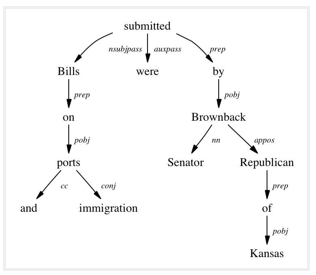

Cây cho thấy “submitted” là từ gốc của câu này và được liên kết bởi hai cây con (cây con chủ ngữ và đối tượng). Mỗi cây con tự nó là một cây phụ thuộc với các mối quan hệ như – (quan hệ “đề xuất” (Bills) <-> “ports” <by>), (quan hệ “liên hợp” (ports) <-> “immigration”).

Kiểu cây này, khi được phân tích cú pháp đệ quy theo cách từ trên xuống dưới, sẽ cung cấp các bộ ba quan hệ ngữ pháp làm đầu ra có thể được sử dụng làm các tính năng cho nhiều vấn đề nlp như phân tích tình cảm theo từng thực thể, nhận dạng diễn viên & thực thể và phân loại văn bản. Trình bao bọc python StanfordCoreNLP (của Stanford NLP Group, chỉ có giấy phép thương mại) và ngữ pháp phụ thuộc NLTK có thể được sử dụng để tạo cây phụ thuộc.

**Đánh dấu từ loại(Part of speedch tagging)** – Ngoài các mối quan hệ ngữ pháp, mỗi từ trong câu cũng được liên kết với một thẻ từ loại (pos) (danh từ, động từ, tính từ, trạng từ, v.v.). Các thẻ pos xác định cách sử dụng và chức năng của một từ trong câu. Sau đây là danh sách tất cả các thẻ pos có thể được định nghĩa bởi trường đại học Pennsylvania. Mã sau sử dụng NLTK thực hiện chú thích gắn thẻ pos trên văn bản đầu vào. (nó cung cấp một số triển khai, triển khai mặc định là perceptron tagger)

```
from nltk import word_tokenize, pos_tag
text = "I am learning Natural Language Processing on Analytics Vidhya"
tokens = word_tokenize(text)
print pos_tag(tokens)
>>> [('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'),('Language', 'NNP'),
('Processing', 'NNP'), ('on', 'IN'), ('Analytics', 'NNP'),('Vidhya', 'NNP')]
```



In [3]:
from nltk import word_tokenize, pos_tag
import nltk
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('punkt')
text = "I am learning Natural Language Processing on Analytics Vidhya"
tokens = word_tokenize(text)
print (pos_tag(tokens))



[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('on', 'IN'), ('Analytics', 'NNP'), ('Vidhya', 'NNP')]


Việc gắn thẻ loại từ được sử dụng cho nhiều mục đích quan trọng trong NLP:
**A.Word sense disambiguation(Giải thích nghĩa của từ):**  Một số từ trong ngôn ngữ có nhiều nghĩa tùy theo cách sử dụng của chúng. Ví dụ, trong hai câu dưới đây:

I. “Please book my flight for Delhi”

II. “I am going to read this book in the flight”

“Book” được sử dụng với ngữ cảnh khác nhau, tuy nhiên thẻ loại từ cho cả hai trường hợp đều khác nhau. Trong câu I, từ “book” được sử dụng như động từ verb , trong khi ở câu II, nó được sử dụng như noun . ( Thuật toán Lesk cũng được sử dụng cho mục đích tương tự)

**B. Cải thiện các tính năng dựa trên từ:** Một mô hình học có thể học các ngữ cảnh khác nhau của một từ khi sử dụng từ làm các tính năng, tuy nhiên nếu thẻ loại từ được liên kết với chúng, ngữ cảnh sẽ được bảo toàn, do đó tạo ra các tính năng mạnh mẽ. Ví dụ:

Câu - “đặt vé máy bay, tôi sẽ đọc cuốn sách này”

Tokens – (“sách”, 2), (“của tôi”, 1), (“chuyến bay”, 1), (“tôi”, 1), (“sẽ”, 1), (“đọc”, 1), (“cái này”, 1)

Tokens with POS – (“book_VB”, 1), (“my_PRP$”, 1), (“flight_NN”, 1), (“I_PRP”, 1), (“will_MD”, 1), (“read_VB”, 1), (“this_DT”, 1), (“book_NN”, 1)

**C. Chuẩn hóa và Lemmatization :** Thẻ POS là cơ sở của quá trình lemmatization để chuyển đổi một từ sang dạng cơ sở của nó (lemma).

**D. Loại bỏ từ dừng hiệu quả(Efficient stopword removal) : **Thẻ POS cũng hữu ích trong việc loại bỏ từ dừng hiệu quả.

Ví dụ, có một số thẻ luôn xác định các từ ít quan trọng/tần suất thấp của một ngôn ngữ. Ví dụ: ( I N – “within”, “upon”, “except”), ( C D – “one”,”two”, “hundred”), ( MD – “may”, “mu st” v.v.)

### 3.2. Enity Extraction(Entities as features)
Các thực thể được định nghĩa là các phần quan trọng nhất của một câu – cụm danh từ, cụm động từ hoặc cả hai. Các thuật toán phát hiện thực thể thường là các mô hình tổng hợp của phân tích cú pháp dựa trên quy tắc, tra cứu từ điển, gắn thẻ pos và phân tích phụ thuộc. Khả năng ứng dụng của phát hiện thực thể có thể thấy trong các bot trò chuyện tự động, trình phân tích nội dung và thông tin chi tiết về người tiêu dùng.

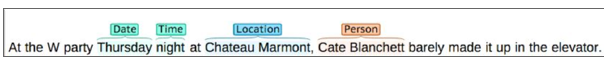

Topic Modelling & Named Entity Recognition là 2 pp phát hiện thực thể chính trong NLP

A. NER(Named Entity Recognition)

Quá trình phát hiện các thực thể được đặt tên như tên người, tên địa điểm, tên công ty, v.v. từ văn bản được gọi là NER. Ví dụ:

Câu – Sergey Brin, giám đốc của Google Inc. đang đi bộ trên đường phố New York.

Các thực thể được đặt tên – (“người”: “Sergey Brin”), (“tổ chức”: “Google Inc.”), (“vị trí”: “New York”)

Một mô hình NER điển hình bao gồm ba khối:

Xác định cụm danh từ: Bước này liên quan đến việc trích xuất tất cả các cụm danh từ từ một văn bản bằng cách sử dụng phân tích phụ thuộc và gắn thẻ từ loại.

Phân loại cụm từ:  Đây là bước phân loại trong đó tất cả các cụm danh từ được trích xuất được phân loại thành các danh mục tương ứng (vị trí, tên, v.v.). API Google Maps cung cấp một đường dẫn tốt để phân biệt vị trí, Sau đó, các cơ sở dữ liệu mở từ dbpedia, wikipedia có thể được sử dụng để xác định tên người hoặc tên công ty. Ngoài ra, người ta có thể quản lý các bảng tra cứu và từ điển bằng cách kết hợp thông tin từ các nguồn khác nhau.

Phân biệt thực thể:  Đôi khi có thể các thực thể bị phân loại sai, do đó việc tạo một lớp xác thực trên đầu kết quả là hữu ích. Có thể khai thác biểu đồ kiến ​​thức cho mục đích này. Các biểu đồ kiến ​​thức phổ biến là – Google Knowledge Graph, IBM Watson và Wikipedia. 

B. Topic Modelling

Mô hình chủ đề là một quá trình tự động xác định các chủ đề có trong một ngữ liệu văn bản, nó suy ra các mẫu ẩn giữa các từ trong ngữ liệu theo cách không giám sát. Các chủ đề được định nghĩa là "một mẫu lặp lại của các thuật ngữ đồng thời xuất hiện trong một ngữ liệu". Một mô hình chủ đề tốt sẽ cho kết quả là - "sức khỏe", "bác sĩ", "bệnh nhân", "bệnh viện" cho một chủ đề - Chăm sóc sức khỏe và "trang trại", "cây trồng", "lúa mì" cho một chủ đề - "Nông nghiệp".

Latent Dirichlet Allocation (LDA) là kỹ thuật mô hình hóa chủ đề phổ biến nhất, Sau đây là mã để triển khai mô hình hóa chủ đề bằng LDA trong python.

C. N-gram as features

Sự kết hợp của N từ với nhau được gọi là N-Gram. N gram (N > 1) thường mang tính thông tin hơn so với các từ (Unigram) dưới dạng các tính năng. Ngoài ra, bigram (N = 2) được coi là các tính năng quan trọng nhất trong số các tính năng khác. Mã sau đây tạo bigram của một văn bản.


In [4]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

generate_ngrams('this is a sample text', 2)
# [['this', 'is'], ['is', 'a'], ['a', 'sample'], , ['sample', 'text']]

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

### 3.3 Tính năng thống kê
Dữ liệu văn bản cũng có thể được định lượng trực tiếp thành số bằng một số kỹ thuật được mô tả trong phần này:

A. Tần suất thuật ngữ(Term Frequency – Inverse Document Frequency) – Tần suất tài liệu nghịch đảo (TF – IDF)
TF-IDF là một mô hình có trọng số thường được sử dụng cho các vấn đề truy xuất thông tin. Nó nhằm mục đích chuyển đổi các tài liệu văn bản thành các mô hình vector dựa trên sự xuất hiện của các từ trong các tài liệu mà không cần xem xét thứ tự chính xác. Ví dụ – giả sử có một tập dữ liệu gồm N tài liệu văn bản, Trong bất kỳ tài liệu nào “D”, TF và IDF sẽ được định nghĩa là –

Tần suất thuật ngữ (TF) – TF cho một thuật ngữ “t” được định nghĩa là số lượng của một thuật ngữ “t” trong tài liệu “D”

Tần suất tài liệu nghịch đảo (IDF ) – IDF cho một thuật ngữ được định nghĩa là logarit của tỷ lệ tổng số tài liệu có trong ngữ liệu và số tài liệu chứa thuật ngữ T.

TF . IDF – Công thức TF IDF đưa ra mức độ quan trọng tương đối của một thuật ngữ trong một ngữ liệu (danh sách các tài liệu), được đưa ra bởi công thức sau đây. Sau đây là mã sử dụng gói scikit learn của python để chuyển đổi một văn bản thành các vectơ tf idf:

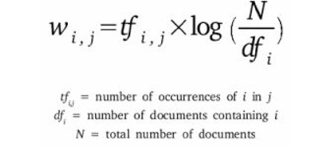

Mô hình tạo ra một từ điển từ vựng và gán một chỉ mục cho mỗi từ. Mỗi hàng trong đầu ra chứa một bộ (i,j) và một giá trị tf-idf của từ tại chỉ mục j trong tài liệu i.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is sample document.', 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)
print (X)

  (0, 7)	0.5844829010200651
  (0, 2)	0.5844829010200651
  (0, 4)	0.444514311537431
  (0, 1)	0.34520501686496574
  (1, 1)	0.3853716274664007
  (1, 0)	0.652490884512534
  (1, 3)	0.652490884512534
  (2, 4)	0.444514311537431
  (2, 1)	0.34520501686496574
  (2, 6)	0.5844829010200651
  (2, 5)	0.5844829010200651


### 3.4. Word Embedding (text vectors)

Nhúng từ là cách hiện đại để biểu diễn từ dưới dạng vectơ. Mục đích của nhúng từ là định nghĩa lại các đặc điểm từ có chiều cao thành các vectơ đặc điểm có chiều thấp bằng cách bảo toàn tính tương đồng theo ngữ cảnh trong ngữ liệu. Chúng được sử dụng rộng rãi trong các mô hình học sâu như Mạng nơ-ron tích chập và Mạng nơ-ron hồi quy.

Word2Vec và GloVe là hai mô hình phổ biến để tạo nhúng từ của văn bản. Các mô hình này lấy một kho văn bản làm đầu vào và tạo ra các vectơ từ làm đầu ra.

Mô hình Word2Vec bao gồm mô-đun tiền xử lý, một mô hình mạng nơ-ron nông có tên là Continuous Bag of Words và một mô hình mạng nơ-ron nông khác có tên là skip-gram. Các mô hình này được sử dụng rộng rãi cho tất cả các vấn đề nlp khác. Đầu tiên, nó xây dựng một vốn từ vựng từ tập huấn luyện và sau đó học các biểu diễn nhúng từ. Mã sau sử dụng gói gensim chuẩn bị nhúng từ dưới dạng các vectơ.

In [2]:
import gensim
print(gensim.__version__)


4.3.3


In [6]:
from gensim.models import Word2Vec

# Tạo corpus
sentences = [['data', 'science'], ['vidhya', 'science', 'data', 'analytics'], ['machine', 'learning'], ['deep', 'learning']]

# Huấn luyện mô hình Word2Vec
model = Word2Vec(sentences, min_count=1)

# Tính độ tương tự giữa các từ
similarity = model.wv.similarity('data', 'science')
print(similarity)

# Lấy vector từ của từ 'learning'
print(model.wv['learning'])


-0.02367166
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e

## 4. Nhiệm vụ quan trọng của NLP
### 4.1. Phân loại văn bản

Phân loại văn bản là một trong những vấn đề kinh điển của NLP. Các ví dụ nổi tiếng bao gồm – Nhận dạng thư rác qua email, phân loại chủ đề tin tức, phân loại tình cảm và tổ chức các trang web bằng công cụ tìm kiếm.

Phân loại văn bản, theo cách nói thông thường được định nghĩa là một kỹ thuật phân loại một cách có hệ thống một đối tượng văn bản (tài liệu hoặc câu) vào một trong các loại cố định. Nó thực sự hữu ích khi lượng dữ liệu quá lớn, đặc biệt là cho mục đích tổ chức, lọc thông tin và lưu trữ.

Một bộ phân loại ngôn ngữ tự nhiên điển hình bao gồm hai phần: (a) Đào tạo (b) Dự đoán như trong hình bên dưới. Đầu tiên, văn bản đầu vào là các quy trình và tính năng được tạo ra. Sau đó, các mô hình học máy học các tính năng này và được sử dụng để dự đoán so với văn bản mới.

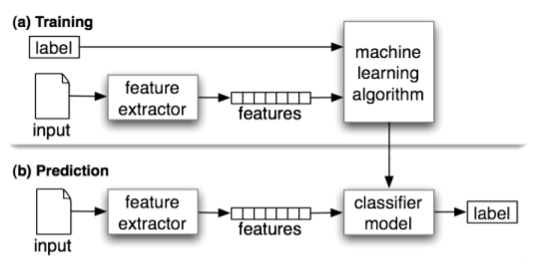

Sau đây là mã sử dụng trình phân loại bayes ngây thơ bằng thư viện blob văn bản (được xây dựng dựa trên nltk).

In [7]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
                   ('I am exhausted of this work.', 'Class_B'),
                   ("I can't cooperate with this", 'Class_B'),
                   ('He is my badest enemy!', 'Class_B'),
                   ('My management is poor.', 'Class_B'),
                   ('I love this burger.', 'Class_A'),
                   ('This is an brilliant place!', 'Class_A'),
                   ('I feel very good about these dates.', 'Class_A'),
                   ('This is my best work.', 'Class_A'),
                   ("What an awesome view", 'Class_A'),
                   ('I do not like this dish', 'Class_B')]
test_corpus = [
                ("I am not feeling well today.", 'Class_B'), 
                ("I feel brilliant!", 'Class_A'), 
                ('Gary is a friend of mine.', 'Class_A'), 
                ("I can't believe I'm doing this.", 'Class_B'), 
                ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]

model = NBC(training_corpus) 
print(model.classify("Their codes are amazing."))

print(model.classify("I don't like their computer."))

print(model.accuracy(test_corpus))

Class_A
Class_B
0.8333333333333334


Scikit.Learn cũng cung cấp một khuôn khổ đường ống để phân loại văn bản:

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 

# preparing data for SVM model (using the same training_corpus, test_corpus from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
    train_data.append(row[0])
    train_labels.append(row[1])

test_data = [] 
test_labels = [] 
for row in test_corpus:
    test_data.append(row[0]) 
    test_labels.append(row[1])

# Create feature vectors 
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)
# Apply model on test data 
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear 
model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_labels) 
prediction = model.predict(test_vectors)


print (classification_report(test_labels, prediction))

              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



Mô hình phân loại văn bản phụ thuộc rất nhiều vào chất lượng và số lượng các tính năng, trong khi áp dụng bất kỳ mô hình học máy nào, việc đưa vào ngày càng nhiều dữ liệu đào tạo luôn là một thực hành tốt. Sau đây là một số mẹo mà tôi đã viết về việc cải thiện độ chính xác của phân loại văn bản trong một trong những bài viết trước đây của tôi.

### 4.2. So khớp văn bản / Tương tự
Một trong những lĩnh vực quan trọng của Xử lý ngôn ngữ tự nhiên (NLP0) là việc khớp các đối tượng văn bản để tìm điểm tương đồng. Các ứng dụng quan trọng của việc khớp văn bản bao gồm sửa lỗi chính tả tự động, loại bỏ trùng lặp dữ liệu và phân tích bộ gen, v.v.

Có một số kỹ thuật khớp văn bản tùy thuộc vào yêu cầu. Phần này mô tả chi tiết các kỹ thuật quan trọng.

A. Khoảng cách Levenshtein – Khoảng cách Levenshtein giữa hai chuỗi được định nghĩa là số lần chỉnh sửa tối thiểu cần thiết để chuyển đổi một chuỗi thành chuỗi kia, với các thao tác chỉnh sửa được phép là chèn, xóa hoặc thay thế một ký tự duy nhất. Sau đây là cách triển khai để tính toán bộ nhớ hiệu quả.

**A. Khoảng cách Levenshtein** – Khoảng cách Levenshtein giữa hai chuỗi được định nghĩa là số lần chỉnh sửa tối thiểu cần thiết để chuyển đổi một chuỗi thành chuỗi kia, với các thao tác chỉnh sửa được phép là chèn, xóa hoặc thay thế một ký tự duy nhất. Sau đây là cách triển khai để tính toán bộ nhớ hiệu quả.

In [9]:

def levenshtein(s1,s2): 
    if len(s1) > len(s2):
        s1,s2 = s2,s1 
    distances = range(len(s1) + 1) 
    for index2,char2 in enumerate(s2):
        newDistances = [index2+1]
        for index1,char1 in enumerate(s1):
            if char1 == char2:
                newDistances.append(distances[index1]) 
            else:
                 newDistances.append(1 + min((distances[index1], distances[index1+1], newDistances[-1]))) 
        distances = newDistances 
    return distances[-1]

print(levenshtein("analyze","analyse"))



1


**B. So khớp ngữ âm(Phonetic Matching)** – Thuật toán so khớp ngữ âm lấy một từ khóa làm đầu vào (tên người, tên địa điểm, v.v.) và tạo ra một chuỗi ký tự xác định một tập hợp các từ (gần giống) về mặt ngữ âm. Thuật toán này rất hữu ích để tìm kiếm các tập văn bản lớn, sửa lỗi chính tả và so khớp các tên có liên quan. Soundex và Metaphone là hai thuật toán ngữ âm chính được sử dụng cho mục đích này. Mô-đun Fuzzy của Python được sử dụng để tính toán các chuỗi soundex cho các từ khác nhau, ví dụ –

``` 
import fuzzy 
soundex = fuzzy.Soundex(4) 
print soundex('ankit')
>>> “A523”
print soundex('aunkit')
>>> “A523” 
```

**C. Flexible String Matching** – Một hệ thống khớp văn bản hoàn chỉnh bao gồm các thuật toán khác nhau được kết hợp với nhau để tính toán nhiều biến thể văn bản. Biểu thức chính quy cũng thực sự hữu ích cho mục đích này. Một kỹ thuật phổ biến khác bao gồm – khớp chuỗi chính xác, khớp lemmatized và khớp compact (xử lý khoảng trắng, dấu câu, tiếng lóng, v.v.).

D. **Độ tương tự Cosine(Cosine similarity)** – Khi văn bản được biểu diễn dưới dạng ký hiệu vectơ, độ tương tự cosine chung cũng có thể được áp dụng để đo độ tương tự vectơ hóa. Mã sau đây chuyển đổi văn bản thành vectơ (sử dụng tần suất thuật ngữ) và áp dụng độ tương tự cosine để cung cấp độ gần giữa hai văn bản.

In [10]:

import math
from collections import Counter
def get_cosine(vec1, vec2):
    common = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()]) 
    sum2 = sum([vec2[x]**2 for x in vec2.keys()]) 
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
   
    if not denominator:
        return 0.0 
    else:
        return float(numerator) / denominator

def text_to_vector(text): 
    words = text.split() 
    return Counter(words)

text1 = 'This is an article on analytics vidhya' 
text2 = 'article on analytics vidhya is about natural language processing'

vector1 = text_to_vector(text1) 
vector2 = text_to_vector(text2) 
cosine = get_cosine(vector1, vector2)
print(cosine)


0.629940788348712


### 4.3 Giải quyết tham chiếu đồng(Coreference Resolution)
Giải quyết tham chiếu chung là quá trình tìm kiếm các liên kết quan hệ giữa các từ (hoặc cụm từ) trong các câu. Hãy xem xét một câu ví dụ: ” Donald đã đến văn phòng của John để xem chiếc bàn mới. Anh ấy đã nhìn nó trong một giờ. ”

Con người có thể nhanh chóng nhận ra rằng "he" biểu thị Donald (và không phải John), và "it" biểu thị cái bàn (và không phải văn phòng của John). Giải quyết tham chiếu chung là thành phần của NLP thực hiện công việc này một cách tự động. Nó được sử dụng trong tóm tắt tài liệu, trả lời câu hỏi và trích xuất thông tin. Stanford CoreNLP cung cấp một package python cho mục đích thương mại.
### 4.4 Các vấn đề / nhiệm vụ NLP khác
Tóm tắt văn bản – Cho một bài viết hoặc đoạn văn bản, hãy tự động tóm tắt để tạo ra các câu quan trọng và có liên quan nhất theo thứ tự.
Dịch máy – Tự động dịch văn bản từ ngôn ngữ của con người sang ngôn ngữ khác bằng cách xử lý ngữ pháp, ngữ nghĩa và thông tin về thế giới thực, v.v.
Tạo và hiểu ngôn ngữ tự nhiên – Chuyển đổi thông tin từ cơ sở dữ liệu máy tính hoặc ý định ngữ nghĩa thành ngôn ngữ con người có thể đọc được được gọi là tạo ngôn ngữ. Chuyển đổi các khối văn bản thành các cấu trúc logic hơn, dễ thao tác hơn đối với các chương trình máy tính được gọi là hiểu ngôn ngữ.
Nhận dạng ký tự quang học – Cho một hình ảnh biểu diễn văn bản in, hãy xác định văn bản tương ứng.
Chuyển tài liệu thành thông tin – Bao gồm việc phân tích dữ liệu văn bản có trong tài liệu (trang web, tệp, tệp PDF và hình ảnh) thành định dạng có thể phân tích và rõ ràng.

## 5.Các thư viện quan trọng cho NLP (python)
- Scikit-learn: Học máy trong Python
- Bộ công cụ ngôn ngữ tự nhiên (NLTK): Bộ công cụ hoàn chỉnh cho tất cả các kỹ thuật NLP.
- Pattern – Một mô-đun khai thác web với các công cụ NLP và máy học.
- TextBlob – API công cụ nl p dễ sử dụng, được xây dựng dựa trên NLTK và Pattern.
- spaCy – N LP mạnh mẽ với Python và Cython.
- Gensim – Mô hình hóa chủ đề cho con người
- Stanford Core NLP – Các dịch vụ và gói NLP của Stanford NLP Group.

In [11]:
import importlib

libraries = [
    "sklearn",
    "nltk",
    "pattern",
    "textblob",
    "spacy",
    "gensim",
    "stanfordnlp",
]

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        print(f"{lib} version: {module.__version__}")
    except ImportError:
        print(f"{lib} is not installed.")
    except AttributeError:
        print(f"Could not find version information for {lib}.")


sklearn version: 1.5.2
nltk version: 3.9.1
pattern is not installed.
Could not find version information for textblob.
spacy version: 3.8.2
gensim version: 4.3.3
stanfordnlp is not installed.
